## --- Model MobileNETv2 --- 

In [15]:
# Import thư viện
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [3]:
# Đếm ảnh fruit từ folders
count = 0 
dirs = os.listdir('Fruits Data 25/train/')
for dir in dirs:
    files = list(os.listdir('Fruits Data 25/train/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

apple Folder has 400 Images
apricot Folder has 400 Images
avocado Folder has 400 Images
banana Folder has 400 Images
black_berry Folder has 400 Images
black_mullberry Folder has 400 Images
coconut Folder has 400 Images
cranberry Folder has 400 Images
dragonfruit Folder has 400 Images
durian Folder has 400 Images
fig Folder has 400 Images
grape Folder has 400 Images
grapefruit Folder has 400 Images
guava Folder has 400 Images
jackfruit Folder has 400 Images
kumquat Folder has 400 Images
longan Folder has 400 Images
mango Folder has 400 Images
mangosteen Folder has 400 Images
olive Folder has 400 Images
papaya Folder has 400 Images
passion_fruit Folder has 400 Images
pineapple Folder has 400 Images
pomegranate Folder has 400 Images
raspberry Folder has 400 Images
Images Folder has 10000 Images


In [5]:
base_train = 'Fruits Data 25/train/'
base_val = 'Fruits Data 25/val/'
IMG_SIZE = 224  # Kích thước ảnh đầu vào (224x224)
BATCH_SIZE = 32
EPOCHS = 10


In [8]:
# Load và tiền xử lí ảnh từ thư mực có phương pháp tăng cường dữ liệu
# tf.data.Dataset có thể thay cho Keras với ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Chuẩn hóa pixel về [0,1]
    rotation_range=30,      # Xoay ảnh ngẫu nhiên trong khoảng 30 độ
    width_shift_range=0.2,  # Dịch ngang 20%
    height_shift_range=0.2, # Dịch dọc 20%
    shear_range=0.2,        # Biến dạng ảnh
    zoom_range=0.2,         # Phóng to/thu nhỏ ảnh
    horizontal_flip=True    # Lật ảnh ngang
)

# Tập train
train_gen = train_datagen.flow_from_directory(
    base_train,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Tập val
val_gen = train_datagen.flow_from_directory(
    base_val,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 10000 images belonging to 25 classes.
Found 1250 images belonging to 25 classes.


In [ ]:
# Thêm AUTOTUNE và shuffe(1000) sau

In [9]:
# Load MobileNetV2 đào tạo model trước
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Đóng băng các lớp của mô hình gốc để chỉ huấn luyện các lớp mới
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)  # Thay thế FC layer bằng GAP
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Giúp giảm overfitting
predictions = Dense(25, activation='softmax')(x)  # 25 lớp đầu ra

# Compile mô hình
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#model.summary()

In [11]:
# Huấn luyện mô hình
history = model.fit(train_gen, validation_data=val_gen, epochs=EPOCHS)

C:\Users\Quoc Bao\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 390s 1s/step - accuracy: 0.1008 - loss: 3.2173 - val_accuracy: 0.5312 - val_loss: 2.1522
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 256s 817ms/step - accuracy: 0.3688 - loss: 2.1991 - val_accuracy: 0.6288 - val_loss: 1.5025
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 208s 665ms/step - accuracy: 0.5071 - loss: 1.6970 - val_accuracy: 0.6888 - val_loss: 1.1852
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 237s 757ms/step - accuracy: 0.5687 - loss: 1.4707 - val_accuracy: 0.7216 - val_loss: 1.0583
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 251s 800ms/step - accuracy: 0.6134 - loss: 1.3214 - val_accuracy: 0.7432 - val_loss: 0.9749
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 229s 731ms/step - accuracy: 0.6479 - loss: 1.1883 - val_accuracy: 0.7424 - val_loss: 0.9277
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 195s 623ms/step - accuracy: 0.6726 - loss: 1.1084 - val_accuracy: 0.7640 - val_loss: 0.8511
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 206s 657ms/step - accuracy: 0.6883 - lo

In [12]:
model.save("fruit_mobilenetv2_ident.h5")

In [14]:
import keras.saving
keras.saving.save_model(model, 'my_model.keras')

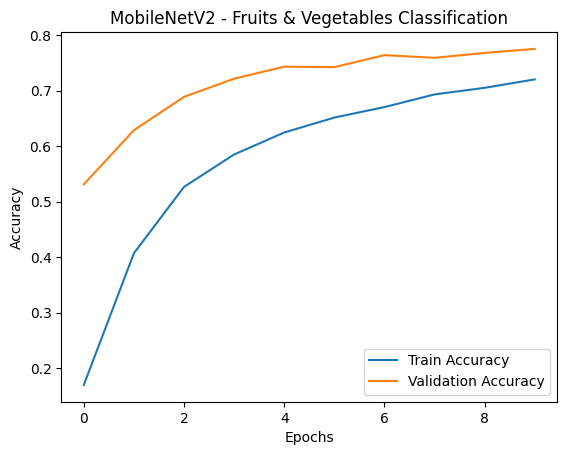

In [13]:
# Vẽ biểu đồ kết quả
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MobileNetV2 - Fruits & Vegetables Classification')
plt.show()

In [ ]:
# Load mô hình đã huấn luyện
model = load_model("my_model.keras")

# Danh sách lớp trái cây (đã cập nhật)
class_names = [
    'apple', 'apricot', 'avocado', 'banana', 'black_berry', 'black_mullberry', 
    'coconut', 'cranberry', 'dragonfruit', 'durian', 'fig', 'grape', 
    'grapefruit', 'guava', 'jackfruit', 'kumquat', 'longan', 'mango', 
    'mangosteen', 'olive', 'papaya', 'passion_fruit', 'pineapple', 
    'pomegranate', 'raspberry'
]

# Hàm nhận diện ảnh
def classify_images(image_path):
    # Đọc ảnh và resize về 224x224
    input_image = tf.keras.utils.load_img(image_path, target_size=(224, 224))
    
    # Chuyển ảnh thành mảng numpy
    input_image_array = tf.keras.utils.img_to_array(input_image)
    
    # Thêm batch dimension (1, 224, 224, 3)
    input_image_exp_dim = tf.expand_dims(input_image_array, axis=0)

    # Chuẩn hóa dữ liệu đúng cách
    input_image_exp_dim = preprocess_input(input_image_exp_dim)

    # Dự đoán
    predictions = model.predict(input_image_exp_dim)

    # Lấy xác suất trực tiếp từ output của model
    result = predictions[0]  

    # Lấy lớp dự đoán cao nhất
    predicted_class = class_names[np.argmax(result)]
    confidence = np.max(result) * 100

    # Trả về kết quả
    return f"Ảnh thuộc về {predicted_class} với độ tin cậy {confidence:.2f}%"



C:\Users\Quoc Bao\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [84]:
image_path = "Fruits Data 25\\train\\mango\\440.jpg"  # Thay bằng ảnh thực tế
print(classify_images(image_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Ảnh thuộc về mango với độ tin cậy 67.16%
